In [41]:
import pandas as pd
pd.set_option('display.max_rows',100)
pd.set_option('display.max_columns',100)
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


## 1. Categorize Diag_1 

In [5]:
df = pd.read_csv('../data/data_for_eda.csv')  
df.head()

,Unnamed: 0,encounter_id,patient_nbr,race,gender,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,insulin,glyburide_metformin,glipizide_metformin,glimepiride_pioglitazone,change,diabetesMed,readmitted,admission_type_desc,discharge_category,admission_category,Specialty_Group,payer_code_group,number_outpatient_log,number_inpatient_log,number_emergency_log
0,0,12522,48330783,Caucasian,Female,80-90,13,68.0,2,28.0,398,427,38,8,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,Steady,No,No,No,Ch,Yes,0,Urgent,Discharged to Home,Transfers from Other Facilities,Other,Self-Pay/Other,0.0,0.0,0.0
1,1,15738,63555939,Caucasian,Female,90-100,12,33.0,3,18.0,434,198,486,8,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,Steady,No,No,No,Ch,Yes,0,Elective,Transfers to Other Healthcare Facilities,Transfers from Other Facilities,Other,Self-Pay/Other,0.0,0.0,0.0
2,2,16680,42519267,Caucasian,Male,40-50,1,51.0,0,8.0,197,157,250,5,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,Steady,No,No,No,Ch,Yes,0,Emergency,Discharged to Home,Emergency Admission,Other,Self-Pay/Other,0.0,0.0,0.0
3,3,28236,89869032,AfricanAmerican,Female,40-50,9,47.0,2,17.0,250.7,403,996,9,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,Yes,1,Emergency,Discharged to Home,Emergency Admission,Other,Self-Pay/Other,0.0,0.0,0.0
4,4,35754,82637451,Caucasian,Male,50-60,3,31.0,6,16.0,414,411,250,9,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,Yes,1,Urgent,Discharged to Home,Physician Referral,Other,Self-Pay/Other,0.0,0.0,0.0


In [7]:
# function to map ICD-9 codes to categories
def map_icd_category(code):
    if pd.isna(code):
        return 'Other'
    
    code_str = str(code).split('.')[0]  # Removing decimal part 
    
    # non-numeric ICD-9 codes starting with 'E' or 'V'
    if code_str.startswith('E') or code_str.startswith('V'):
        return 'Other'
    
    try:
        code = int(code_str)  # Converting numeric part to integer
    except ValueError:
        return 'Other'  
    
    # Map numeric ICD-9 codes to categories
    if 390 <= code <= 459 or code == 785:
        return 'Circulatory'
    elif 460 <= code <= 519 or code == 786:
        return 'Respiratory'
    elif 520 <= code <= 579 or code == 787:
        return 'Digestive'
    elif code == 250:
        return 'Diabetes'
    elif 800 <= code <= 999:
        return 'Injury'
    elif 710 <= code <= 739:
        return 'Musculoskeletal'
    elif 580 <= code <= 629 or code == 788:
        return 'Genitourinary'
    elif 140 <= code <= 239:
        return 'Neoplasms'
    elif (780 <= code <= 799) or (240 <= code <= 279 and code != 250) or \
         (680 <= code <= 709) or (1 <= code <= 139) or (290 <= code <= 319) or \
         (code in range(280, 290)) or (code in range(320, 360)) or \
         (code in range(360, 390)) or (code in range(740, 760)):
        return 'Other'
    else:
        return 'Other'

# Applying mapping function to diag_1, diag_2, diag_3 columns
df['diag_1_cat'] = df['diag_1'].apply(map_icd_category)
df['diag_2_cat'] = df['diag_2'].apply(map_icd_category)
df['diag_3_cat'] = df['diag_3'].apply(map_icd_category)

print(df[['diag_1', 'diag_1_cat', 'diag_2', 'diag_2_cat', 'diag_3', 'diag_3_cat']].head())

  diag_1   diag_1_cat diag_2   diag_2_cat diag_3   diag_3_cat
0    398  Circulatory    427  Circulatory     38        Other
1    434  Circulatory    198    Neoplasms    486  Respiratory
2    197    Neoplasms    157    Neoplasms    250     Diabetes
3  250.7     Diabetes    403  Circulatory    996       Injury
4    414  Circulatory    411  Circulatory    250     Diabetes


In [31]:
pd.crosstab(df['readmitted'], df['diag_3_cat'])

diag_3_cat,Circulatory,Diabetes,Digestive,Genitourinary,Injury,Musculoskeletal,Neoplasms,Other,Respiratory
readmitted,,,,,,,,,
0,12356,7855,1533,2421,828,817,731,13230,2841
1,12310,6776,1567,2913,657,708,621,11726,3127


In [32]:
df.to_clipboard()

## 2. Mapping Drug columns to numeric and plotting correlation matrix to find best correlated features and avoid multicolinearity

For a project focused on diabetes management and predicting readmissions, the most important medications from your list would likely be those that are widely used to control blood sugar levels and have a direct impact on diabetes outcomes, such as hospitalization or readmission. The key drugs to focus on are:

Metformin: First-line therapy for Type 2 diabetes, widely prescribed due to its effectiveness in lowering blood glucose and improving insulin sensitivity. It’s crucial for controlling blood sugar and preventing complications that could lead to hospital readmission.

Sulfonylureas (Chlorpropamide, Glimepiride, Acetohexamide, Glipizide, Glyburide, Tolbutamide, Tolazamide): These drugs are important because they stimulate insulin production and are often prescribed when metformin alone is not sufficient. They can, however, cause hypoglycemia, which can lead to hospital visits if not managed well.

Insulin: Essential for patients with advanced Type 2 diabetes or Type 1 diabetes. It's critical to understand how insulin usage correlates with patient outcomes since improper use or mismanagement can lead to readmissions due to either hyperglycemia or hypoglycemia.

Thiazolidinediones (Pioglitazone, Rosiglitazone): These drugs improve insulin sensitivity but can have side effects such as fluid retention and heart failure, which may influence readmission rates.

Meglitinides (Repaglinide, Nateglinide): Similar to sulfonylureas but with a shorter action. They are useful in controlling post-meal glucose spikes, which are important in managing diabetes and reducing complications that might lead to readmission.

Combination therapies (Glyburide-Metformin, Glipizide-Metformin, Glimepiride-Pioglitazone): Combination therapies are often prescribed to enhance the control of blood glucose levels, making them critical in reducing readmissions due to poor diabetes management.

Medications with Less Direct Impact:
Troglitazone: Since this drug was withdrawn from the market, it’s not relevant.
Acarbose & Miglitol: While these medications help control blood glucose, they are not as widely used or as impactful as others like metformin, sulfonylureas, or insulin. However, they could still be relevant if gastrointestinal side effects are connected to readmissions.
Key Focus:
Metformin, Sulfonylureas, Insulin, and Thiazolidinediones should be your priority since they are most commonly prescribed for blood glucose control and have the highest potential to impact patient outcomes and readmissions.

In [12]:
med_change_mapping = {
    'No': 0,
    'Steady': 1,
    'Up': 2,
    'Down': -1
}
 
med_cols = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
            'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone',
            'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'insulin', 'glyburide_metformin',
            'glipizide_metformin', 'glimepiride_pioglitazone']

In [13]:
for col in med_cols:
    if col in df.columns:
        df[col] = df[col].map(med_change_mapping).fillna(0)  

In [14]:
df.head()

,Unnamed: 0,encounter_id,patient_nbr,race,gender,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,insulin,glyburide_metformin,glipizide_metformin,glimepiride_pioglitazone,change,diabetesMed,readmitted,admission_type_desc,discharge_category,admission_category,Specialty_Group,payer_code_group,number_outpatient_log,number_inpatient_log,number_emergency_log,diag_1_cat,diag_2_cat,diag_3_cat
0,0,12522,48330783,Caucasian,Female,80-90,13,68.0,2,28.0,398,427,38,8,No,No,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,Ch,Yes,0,Urgent,Discharged to Home,Transfers from Other Facilities,Other,Self-Pay/Other,0.0,0.0,0.0,Circulatory,Circulatory,Other
1,1,15738,63555939,Caucasian,Female,90-100,12,33.0,3,18.0,434,198,486,8,No,No,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,Ch,Yes,0,Elective,Transfers to Other Healthcare Facilities,Transfers from Other Facilities,Other,Self-Pay/Other,0.0,0.0,0.0,Circulatory,Neoplasms,Respiratory
2,2,16680,42519267,Caucasian,Male,40-50,1,51.0,0,8.0,197,157,250,5,No,No,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,Ch,Yes,0,Emergency,Discharged to Home,Emergency Admission,Other,Self-Pay/Other,0.0,0.0,0.0,Neoplasms,Neoplasms,Diabetes
3,3,28236,89869032,AfricanAmerican,Female,40-50,9,47.0,2,17.0,250.7,403,996,9,No,No,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,No,Yes,1,Emergency,Discharged to Home,Emergency Admission,Other,Self-Pay/Other,0.0,0.0,0.0,Diabetes,Circulatory,Injury
4,4,35754,82637451,Caucasian,Male,50-60,3,31.0,6,16.0,414,411,250,9,No,No,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,No,Yes,1,Urgent,Discharged to Home,Physician Referral,Other,Self-Pay/Other,0.0,0.0,0.0,Circulatory,Circulatory,Diabetes


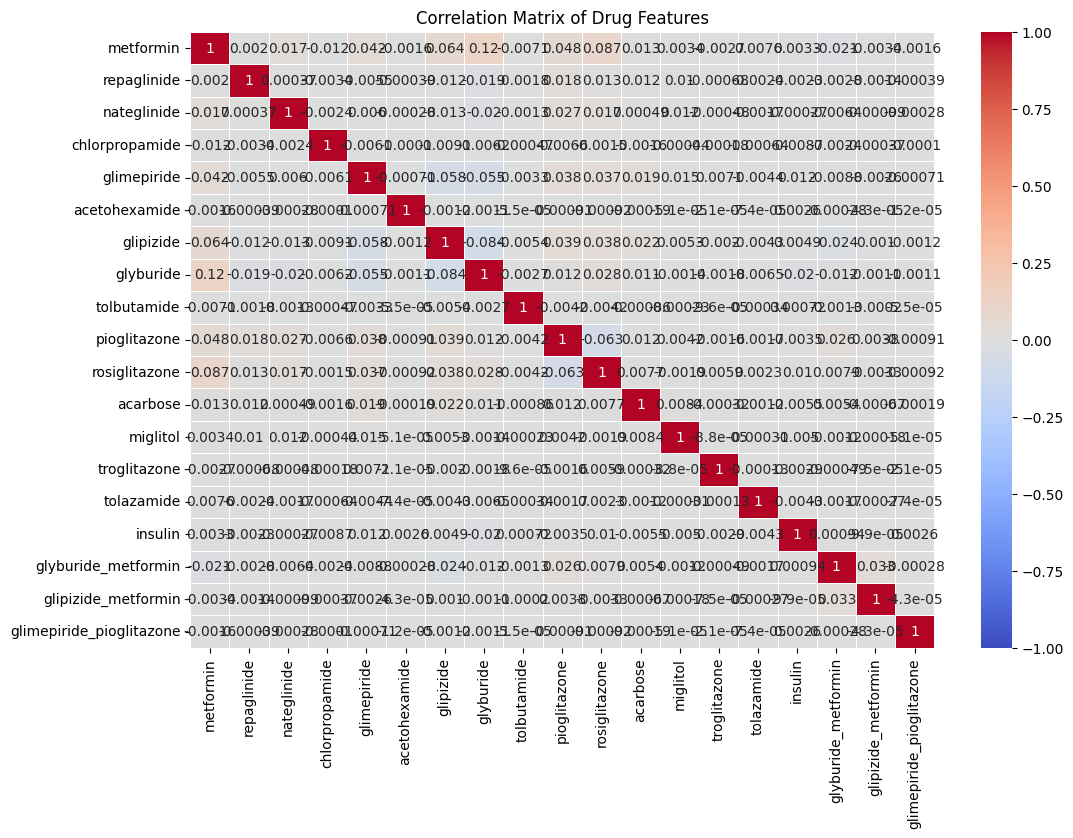

In [20]:
#Plot the Correlation Matrix
# Calculate the correlation matrix
corr_matrix = df[med_cols].corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)
plt.title('Correlation Matrix of Drug Features')
plt.show()

In [21]:
corr_matrix

,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,insulin,glyburide_metformin,glipizide_metformin,glimepiride_pioglitazone
metformin,1.000000,0.002010,0.017405,-0.011761,0.041534,-0.001552,0.063909,0.124469,-0.007113,0.048390,0.087077,0.012860,0.003394,-0.002688,0.007606,0.003286,-0.021004,-0.003390,-0.001552
repaglinide,0.002010,1.000000,0.000374,-0.003390,-0.005492,-0.000394,-0.011881,-0.019448,-0.001806,0.017909,0.013393,0.012029,0.010387,-0.000682,-0.002432,-0.002339,-0.002801,-0.001421,-0.000394
nateglinide,0.017405,0.000374,1.000000,-0.002370,0.005969,-0.000275,-0.013003,-0.020196,-0.001263,0.027439,0.016656,0.000492,0.011505,-0.000477,-0.001701,-0.000274,-0.006407,-0.000993,-0.000275
chlorpropamide,-0.011761,-0.003390,-0.002370,1.000000,-0.006143,-0.000104,-0.009110,-0.006152,-0.000475,-0.006575,-0.001463,-0.001609,-0.000437,-0.000180,-0.000640,-0.008725,-0.002410,-0.000374,-0.000104
glimepiride,0.041534,-0.005492,0.005969,-0.006143,1.000000,-0.000714,-0.058491,-0.055122,-0.003272,0.037845,0.036828,0.018699,0.015070,0.007118,-0.004408,0.011612,-0.008847,-0.002574,-0.000714
acetohexamide,-0.001552,-0.000394,-0.000275,-0.000104,-0.000714,1.000000,-0.001168,-0.001057,-0.000055,-0.000913,-0.000921,-0.000187,-0.000051,-0.000021,-0.000074,0.002573,-0.000280,-0.000043,-0.000012
glipizide,0.063909,-0.011881,-0.013003,-0.009110,-0.058491,-0.001168,1.000000,-0.084436,-0.005353,0.039496,0.038206,0.021630,0.005342,-0.002023,-0.004312,0.004901,-0.024452,0.000998,-0.001168
glyburide,0.124469,-0.019448,-0.020196,-0.006152,-0.055122,-0.001057,-0.084436,1.000000,-0.002705,0.012168,0.028309,0.011251,-0.001396,-0.001830,-0.006524,-0.020422,-0.011648,-0.001093,-0.001057
tolbutamide,-0.007113,-0.001806,-0.001263,-0.000475,-0.003272,-0.000055,-0.005353,-0.002705,1.000000,-0.004185,-0.004222,-0.000857,-0.000233,-0.000096,-0.000341,0.000725,-0.001284,-0.000199,-0.000055
pioglitazone,0.048390,0.017909,0.027439,-0.006575,0.037845,-0.000913,0.039496,0.012168,-0.004185,1.000000,-0.062555,0.012197,0.004155,-0.001582,-0.001682,-0.003463,0.025788,0.003816,-0.000913


In [19]:
# Handle Multicollinearity
# Setting a correlation threshold
threshold = 0.6

# Identify pairs of highly correlated features
high_corr_pairs = []
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > threshold:
            high_corr_pairs.append((corr_matrix.columns[i], corr_matrix.columns[j]))

# Drop one feature from each pair of highly correlated features
for col1, col2 in high_corr_pairs:
    if col1 in df.columns:
        df.drop(col1, axis=1, inplace=True)
        
print(f"Highly correlated pairs: {high_corr_pairs}")

Highly correlated pairs: []


- Metformin, Sulfonylureas, Insulin, and Thiazolidinediones should be your priority since they are most commonly prescribed for blood glucose control and have the highest potential to impact patient outcomes and readmissions.

In [34]:
target_col = 'readmitted'  
med_cols = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
            'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone',
            'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'insulin',
            'glyburide_metformin', 'glipizide_metformin', 'glimepiride_pioglitazone']

# Calculate correlation between each medicine and the target variable
correlations = df[med_cols + [target_col]].corr()[target_col]

# Set threshold to identify highly correlated features
threshold = 0.6 

# Find medicines that are highly correlated with the target variable
highly_correlated_meds = correlations[abs(correlations) > threshold].drop(target_col)

print("Highly correlated medicines with target variable (threshold = {}):".format(threshold))
print(highly_correlated_meds)

Highly correlated medicines with target variable (threshold = 0.004):
metformin             -0.032986
repaglinide            0.021409
nateglinide            0.006616
glimepiride            0.004767
glipizide              0.008852
glyburide             -0.012517
pioglitazone           0.011357
rosiglitazone          0.004772
acarbose               0.012867
tolazamide            -0.005860
insulin                0.004610
glyburide_metformin    0.005296
Name: readmitted, dtype: float64


In [36]:

pd.crosstab(df['readmitted'],df['metformin'])

metformin,-1,0,1,2
readmitted,,,,
0,251,33720,8120,521
1,228,33047,6746,384


In [39]:
# List of drug columns to iterate over
drug_columns = [
    'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
    'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone',
    'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 
    'insulin', 'glyburide_metformin', 'glipizide_metformin', 'glimepiride_pioglitazone'
]
# Filter for diabetic patients
diabetic_patients = df[df['diag_3_cat'] == 'Diabetes']

# Loop through each drug column and create a percentage crosstab with 'readmitted'
crosstab_results = {}
for drug in drug_columns:
    if drug in diabetic_patients.columns:
        # Create crosstab with percentages for diabetic patients
        crosstab_results[drug] = pd.crosstab(diabetic_patients['readmitted'], diabetic_patients[drug], 
                                              margins=True, 
                                              margins_name="Total", 
                                              normalize='index') * 100  

for drug, result in crosstab_results.items():
    print(f"Percentage Crosstab for {drug} among Diabetic Patients:\n{result}\n")

Percentage Crosstab for metformin among Diabetic Patients:
metformin         -1          0          1         2
readmitted                                          
0           0.725652  75.862508  22.011458  1.400382
1           0.634593  78.792798  19.642857  0.929752
Total       0.683480  77.219602  20.914497  1.182421

Percentage Crosstab for repaglinide among Diabetic Patients:
repaglinide        -1          0         1         2
readmitted                                          
0            0.038192  98.994271  0.916614  0.050923
1            0.029516  98.716057  1.136364  0.118064
Total        0.034174  98.865423  1.018386  0.082018

Percentage Crosstab for nateglinide among Diabetic Patients:
nateglinide        -1          0         1         2
readmitted                                          
0            0.025461  99.414386  0.521961  0.038192
1            0.000000  99.394923  0.605077  0.000000
Total        0.013670  99.405372  0.560454  0.020504

Percentage Crosstab f

## 3. Replace Age with random age in the range provide

In [47]:
# Define the mapping of age ranges to their corresponding min and max values
age_ranges = {
    '0-10': (0, 10),
    '10-20': (10, 20),
    '20-30': (20, 30),
    '30-40': (30, 40),
    '40-50': (40, 50),
    '50-60': (50, 60),
    '60-70': (60, 70),
    '70-80': (70, 80),
    '80-90': (80, 90),
    '90-100': (90, 100)
}

# Function to generate a random number within the specified range
def random_age(age_group):
    min_age, max_age = age_ranges[age_group]
    return np.random.randint(min_age, max_age + 1)  # +1 to include max_age

# Applying the function to generate random ages
df['Patient_Age'] = df['age'].apply(random_age)

   Unnamed: 0  encounter_id  patient_nbr             race  gender     age  \
0           0         12522     48330783        Caucasian  Female   80-90   
1           1         15738     63555939        Caucasian  Female  90-100   
2           2         16680     42519267        Caucasian    Male   40-50   
3           3         28236     89869032  AfricanAmerican  Female   40-50   
4           4         35754     82637451        Caucasian    Male   50-60   

   time_in_hospital  num_lab_procedures  num_procedures  num_medications  \
0                13                68.0               2             28.0   
1                12                33.0               3             18.0   
2                 1                51.0               0              8.0   
3                 9                47.0               2             17.0   
4                 3                31.0               6             16.0   

  diag_1 diag_2 diag_3  number_diagnoses max_glu_serum A1Cresult  metformin  \
0

In [49]:
df.head()

,encounter_id,patient_nbr,race,gender,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,insulin,glyburide_metformin,glipizide_metformin,glimepiride_pioglitazone,change,diabetesMed,readmitted,admission_type_desc,discharge_category,admission_category,Specialty_Group,payer_code_group,number_outpatient_log,number_inpatient_log,number_emergency_log,diag_1_cat,diag_2_cat,diag_3_cat,Patient_Age
0,12522,48330783,Caucasian,Female,80-90,13,68.0,2,28.0,398,427,38,8,No,No,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,Ch,Yes,0,Urgent,Discharged to Home,Transfers from Other Facilities,Other,Self-Pay/Other,0.0,0.0,0.0,Circulatory,Circulatory,Other,86
1,15738,63555939,Caucasian,Female,90-100,12,33.0,3,18.0,434,198,486,8,No,No,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,Ch,Yes,0,Elective,Transfers to Other Healthcare Facilities,Transfers from Other Facilities,Other,Self-Pay/Other,0.0,0.0,0.0,Circulatory,Neoplasms,Respiratory,97
2,16680,42519267,Caucasian,Male,40-50,1,51.0,0,8.0,197,157,250,5,No,No,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,Ch,Yes,0,Emergency,Discharged to Home,Emergency Admission,Other,Self-Pay/Other,0.0,0.0,0.0,Neoplasms,Neoplasms,Diabetes,44
3,28236,89869032,AfricanAmerican,Female,40-50,9,47.0,2,17.0,250.7,403,996,9,No,No,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,No,Yes,1,Emergency,Discharged to Home,Emergency Admission,Other,Self-Pay/Other,0.0,0.0,0.0,Diabetes,Circulatory,Injury,48
4,35754,82637451,Caucasian,Male,50-60,3,31.0,6,16.0,414,411,250,9,No,No,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,No,Yes,1,Urgent,Discharged to Home,Physician Referral,Other,Self-Pay/Other,0.0,0.0,0.0,Circulatory,Circulatory,Diabetes,57


In [48]:
df.drop(columns={'Unnamed: 0'}, inplace=True)

# EDA

## 1. Data Overview

In [51]:
df.head()

,encounter_id,patient_nbr,race,gender,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,insulin,glyburide_metformin,glipizide_metformin,glimepiride_pioglitazone,change,diabetesMed,readmitted,admission_type_desc,discharge_category,admission_category,Specialty_Group,payer_code_group,number_outpatient_log,number_inpatient_log,number_emergency_log,diag_1_cat,diag_2_cat,diag_3_cat,Patient_Age
0,12522,48330783,Caucasian,Female,80-90,13,68.0,2,28.0,398,427,38,8,No,No,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,Ch,Yes,0,Urgent,Discharged to Home,Transfers from Other Facilities,Other,Self-Pay/Other,0.0,0.0,0.0,Circulatory,Circulatory,Other,86
1,15738,63555939,Caucasian,Female,90-100,12,33.0,3,18.0,434,198,486,8,No,No,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,Ch,Yes,0,Elective,Transfers to Other Healthcare Facilities,Transfers from Other Facilities,Other,Self-Pay/Other,0.0,0.0,0.0,Circulatory,Neoplasms,Respiratory,97
2,16680,42519267,Caucasian,Male,40-50,1,51.0,0,8.0,197,157,250,5,No,No,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,Ch,Yes,0,Emergency,Discharged to Home,Emergency Admission,Other,Self-Pay/Other,0.0,0.0,0.0,Neoplasms,Neoplasms,Diabetes,44
3,28236,89869032,AfricanAmerican,Female,40-50,9,47.0,2,17.0,250.7,403,996,9,No,No,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,No,Yes,1,Emergency,Discharged to Home,Emergency Admission,Other,Self-Pay/Other,0.0,0.0,0.0,Diabetes,Circulatory,Injury,48
4,35754,82637451,Caucasian,Male,50-60,3,31.0,6,16.0,414,411,250,9,No,No,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,No,Yes,1,Urgent,Discharged to Home,Physician Referral,Other,Self-Pay/Other,0.0,0.0,0.0,Circulatory,Circulatory,Diabetes,57


In [54]:
# 1. Data Overview
print("First 5 Rows:")
df.head()


First 5 Rows:


,encounter_id,patient_nbr,race,gender,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,insulin,glyburide_metformin,glipizide_metformin,glimepiride_pioglitazone,change,diabetesMed,readmitted,admission_type_desc,discharge_category,admission_category,Specialty_Group,payer_code_group,number_outpatient_log,number_inpatient_log,number_emergency_log,diag_1_cat,diag_2_cat,diag_3_cat,Patient_Age
0,12522,48330783,Caucasian,Female,80-90,13,68.0,2,28.0,398,427,38,8,No,No,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,Ch,Yes,0,Urgent,Discharged to Home,Transfers from Other Facilities,Other,Self-Pay/Other,0.0,0.0,0.0,Circulatory,Circulatory,Other,86
1,15738,63555939,Caucasian,Female,90-100,12,33.0,3,18.0,434,198,486,8,No,No,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,Ch,Yes,0,Elective,Transfers to Other Healthcare Facilities,Transfers from Other Facilities,Other,Self-Pay/Other,0.0,0.0,0.0,Circulatory,Neoplasms,Respiratory,97
2,16680,42519267,Caucasian,Male,40-50,1,51.0,0,8.0,197,157,250,5,No,No,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,Ch,Yes,0,Emergency,Discharged to Home,Emergency Admission,Other,Self-Pay/Other,0.0,0.0,0.0,Neoplasms,Neoplasms,Diabetes,44
3,28236,89869032,AfricanAmerican,Female,40-50,9,47.0,2,17.0,250.7,403,996,9,No,No,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,No,Yes,1,Emergency,Discharged to Home,Emergency Admission,Other,Self-Pay/Other,0.0,0.0,0.0,Diabetes,Circulatory,Injury,48
4,35754,82637451,Caucasian,Male,50-60,3,31.0,6,16.0,414,411,250,9,No,No,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,No,Yes,1,Urgent,Discharged to Home,Physician Referral,Other,Self-Pay/Other,0.0,0.0,0.0,Circulatory,Circulatory,Diabetes,57


In [56]:

print("\nSummary Statistics:")
df.describe(include='all')



Summary Statistics:


,encounter_id,patient_nbr,race,gender,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,insulin,glyburide_metformin,glipizide_metformin,glimepiride_pioglitazone,change,diabetesMed,readmitted,admission_type_desc,discharge_category,admission_category,Specialty_Group,payer_code_group,number_outpatient_log,number_inpatient_log,number_emergency_log,diag_1_cat,diag_2_cat,diag_3_cat,Patient_Age
count,8.301700e+04,8.301700e+04,83017,83017,83017,83017.000000,83017.000000,83017.000000,83017.000000,83017,83017,83017,83017.000000,83017,83017,83017.000000,83017.000000,83017.000000,83017.000000,83017.000000,83017.000000,83017.000000,83017.000000,83017.000000,83017.000000,83017.000000,83017.000000,83017.000000,83017.000000,83017.000000,83017.000000,83017.000000,83017.000000,83017.000000,83017,83017,83017.0,83017,83017,83017,83017,83017,83017.000000,83017.000000,83017.000000,83017,83017,83017,83017.000000
unique,NaN,NaN,5,2,10,NaN,NaN,NaN,NaN,703,714,759,NaN,4,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2,2.0,4,4,4,5,3,NaN,NaN,NaN,9,9,9,NaN
top,NaN,NaN,Caucasian,Female,70-80,NaN,NaN,NaN,NaN,428,428,250,NaN,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,Yes,0.0,Emergency,Discharged to Home,Emergency Admission,Other,Self-Pay/Other,NaN,NaN,NaN,Circulatory,Circulatory,Other,NaN
freq,NaN,NaN,61609,44781,21297,NaN,NaN,NaN,NaN,5674,5745,9705,NaN,78063,69111,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45140,63773,42612.0,42405,60599,44995,70963,42578,NaN,NaN,NaN,25015,26942,24956,NaN
mean,1.303046e+08,4.875471e+07,NaN,NaN,NaN,4.435778,43.114838,1.329198,15.605382,NaN,NaN,NaN,7.258357,NaN,NaN,0.195105,0.015322,0.006794,0.001036,0.049339,0.000012,0.124372,0.107857,0.000253,0.071263,0.071299,0.003180,0.000325,0.000036,0.000482,0.391137,0.006794,0.000157,0.000012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.161414,0.322299,0.093222,NaN,NaN,NaN,65.507149
std,6.862627e+07,3.552541e+07,NaN,NaN,NaN,2.998939,19.172313,1.684347,7.353721,NaN,NaN,NaN,1.966873,NaN,NaN,0.436330,0.134980,0.085592,0.034692,0.239854,0.003471,0.369576,0.354221,0.015903,0.270858,0.268594,0.059019,0.022221,0.006011,0.022488,0.821354,0.084172,0.012513,0.003471,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.415852,0.508392,0.300968,NaN,NaN,NaN,16.303758
min,1.252200e+04,1.350000e+02,NaN,NaN,NaN,1.000000,1.000000,0.000000,1.000000,NaN,NaN,NaN,1.000000,NaN,NaN,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,-1.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,0.000000,-1.000000,-1.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,0.000000
25%,7.386614e+07,1.976999e+07,NaN,NaN,NaN,2.000000,32.000000,0.000000,10.000000,NaN,NaN,NaN,6.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,55.000000
50%,1.306772e+08,4.230473e+07,NaN,NaN,NaN,4.000000,44.000000,1.000000,15.000000,NaN,NaN,NaN,8.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,68.000000
75%,1.773914e+08,8.489800e+07,NaN,NaN,NaN,6.000000,57.000000,2.000000,20.000000,NaN,NaN,NaN,9.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.693147,0.000

In [57]:

print("\nMissing Values:")
df.isnull().sum()


Missing Values:


encounter_id                0
patient_nbr                 0
race                        0
gender                      0
age                         0
time_in_hospital            0
num_lab_procedures          0
num_procedures              0
num_medications             0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazone                0
rosiglitazone               0
acarbose                    0
miglitol                    0
troglitazone                0
tolazamide                  0
insulin                     0
glyburide_metformin         0
glipizide_metformin         0
glimepirid

## 2. Visualizations

In [69]:
df.select_dtypes(include=['int', 'float']).columns.to_list()

['encounter_id',
 'patient_nbr',
 'time_in_hospital',
 'num_lab_procedures',
 'num_procedures',
 'num_medications',
 'number_diagnoses',
 'metformin',
 'repaglinide',
 'nateglinide',
 'chlorpropamide',
 'glimepiride',
 'acetohexamide',
 'glipizide',
 'glyburide',
 'tolbutamide',
 'pioglitazone',
 'rosiglitazone',
 'acarbose',
 'miglitol',
 'troglitazone',
 'tolazamide',
 'insulin',
 'glyburide_metformin',
 'glipizide_metformin',
 'glimepiride_pioglitazone',
 'number_outpatient_log',
 'number_inpatient_log',
 'number_emergency_log',
 'Patient_Age']

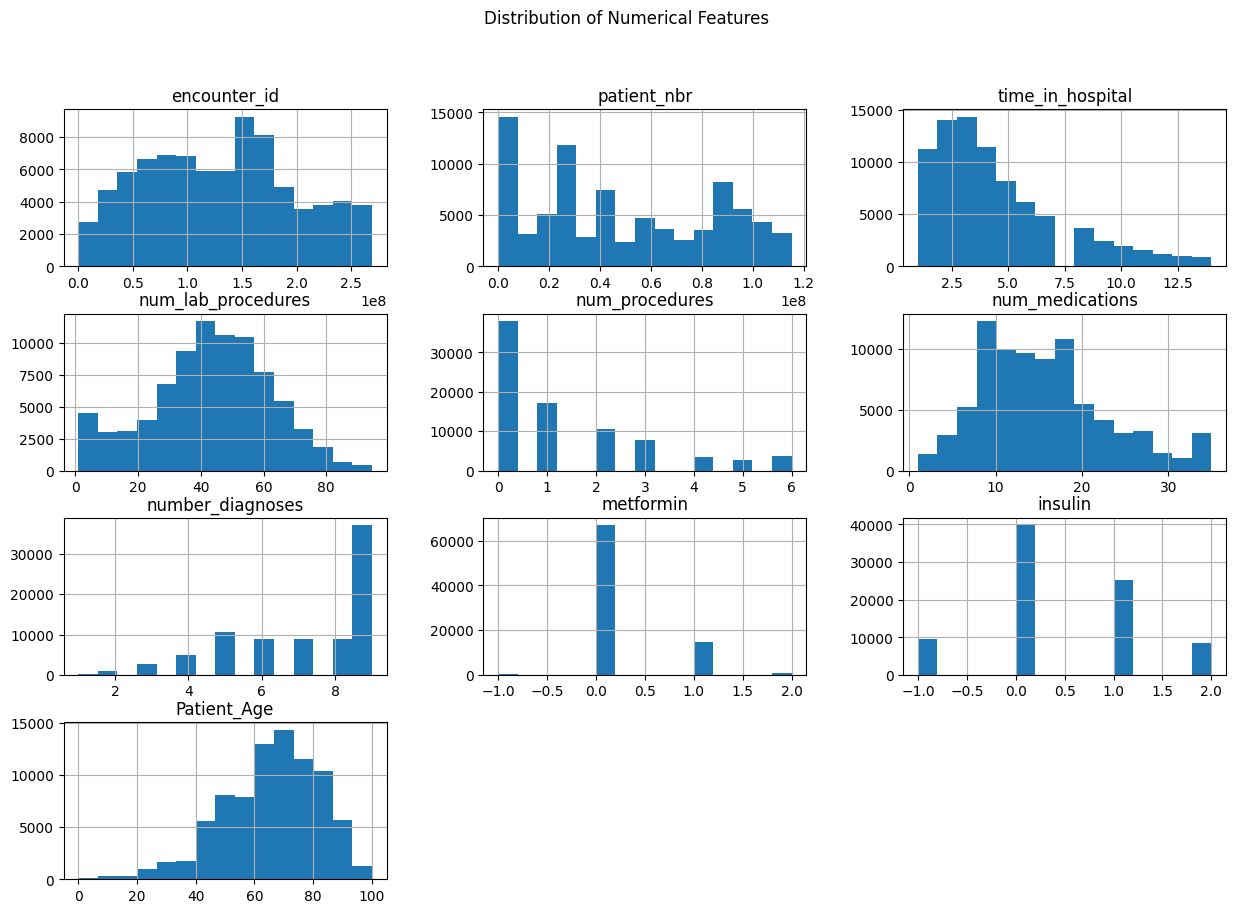

In [71]:
# Distribution of Numerical Features
num_features = ['encounter_id',
 'patient_nbr',
 'time_in_hospital',
 'num_lab_procedures',
 'num_procedures',
 'num_medications',
 'number_diagnoses',
 'metformin',
 'insulin',
 'Patient_Age']
df[num_features].hist(bins=15, figsize=(15, 10))
plt.suptitle('Distribution of Numerical Features')
plt.show()

In [72]:
df.select_dtypes(include=['object']).columns.to_list()

['race',
 'gender',
 'age',
 'diag_1',
 'diag_2',
 'diag_3',
 'max_glu_serum',
 'A1Cresult',
 'change',
 'diabetesMed',
 'admission_type_desc',
 'discharge_category',
 'admission_category',
 'Specialty_Group',
 'payer_code_group',
 'diag_1_cat',
 'diag_2_cat',
 'diag_3_cat']

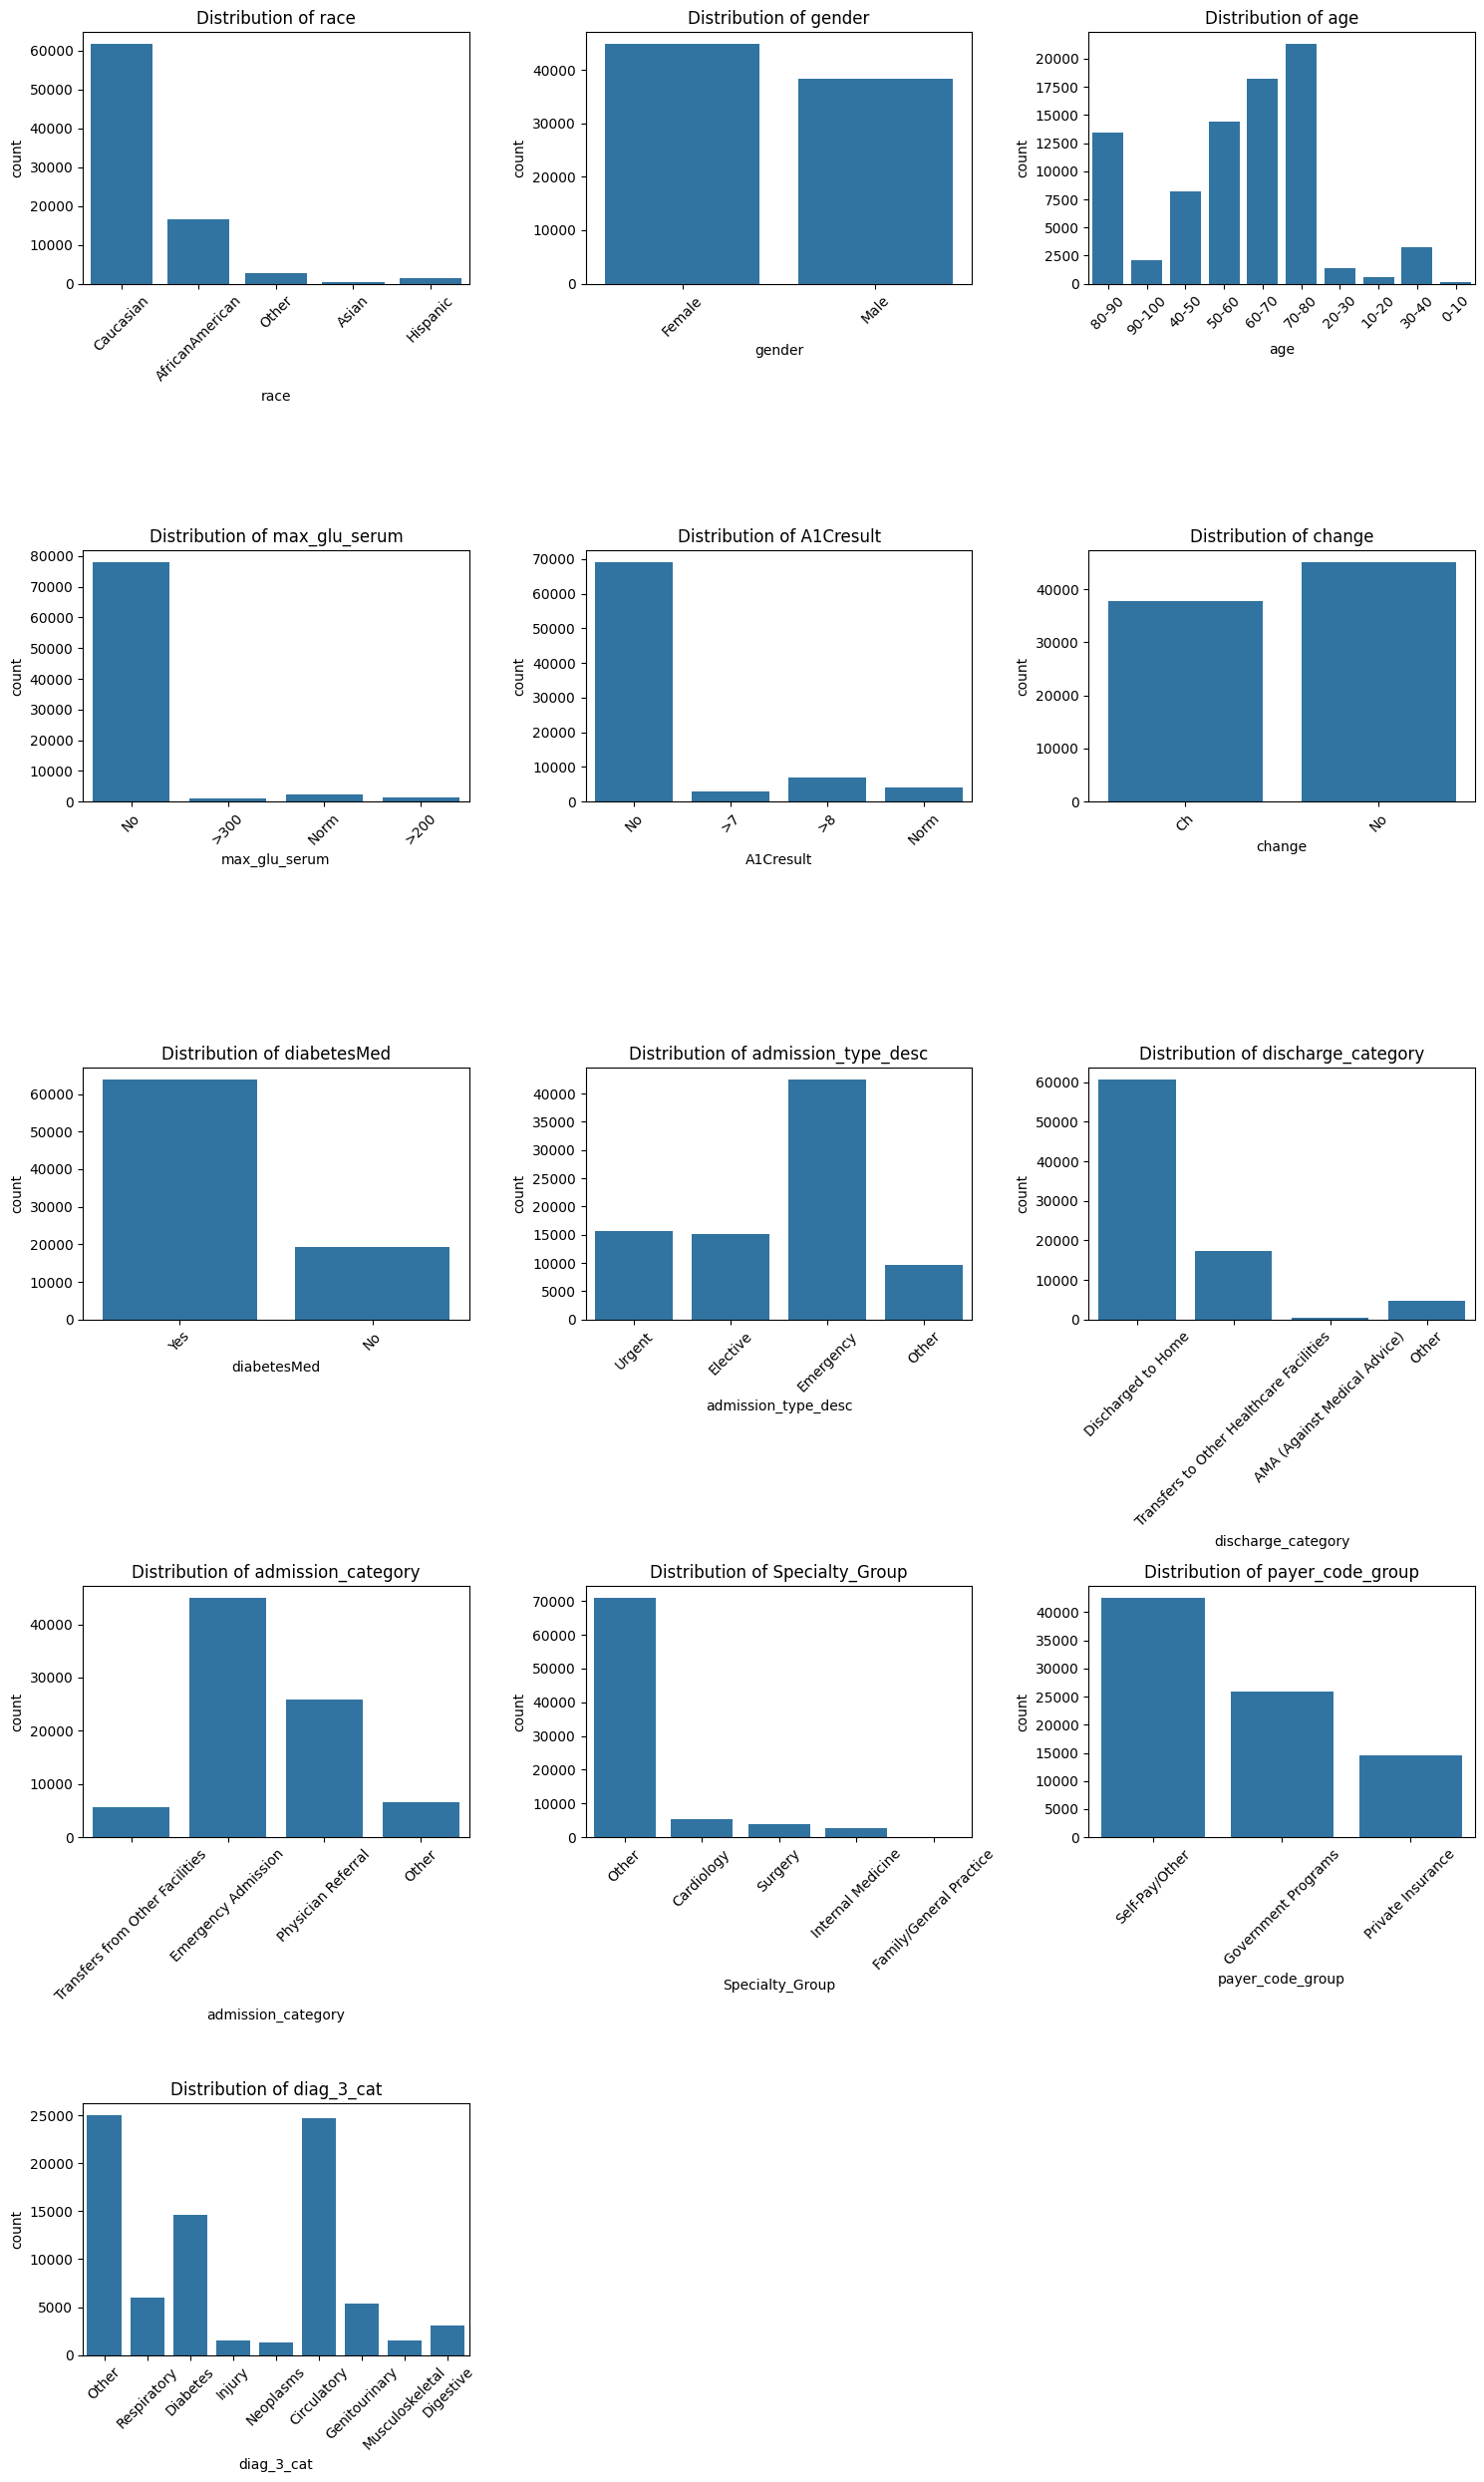

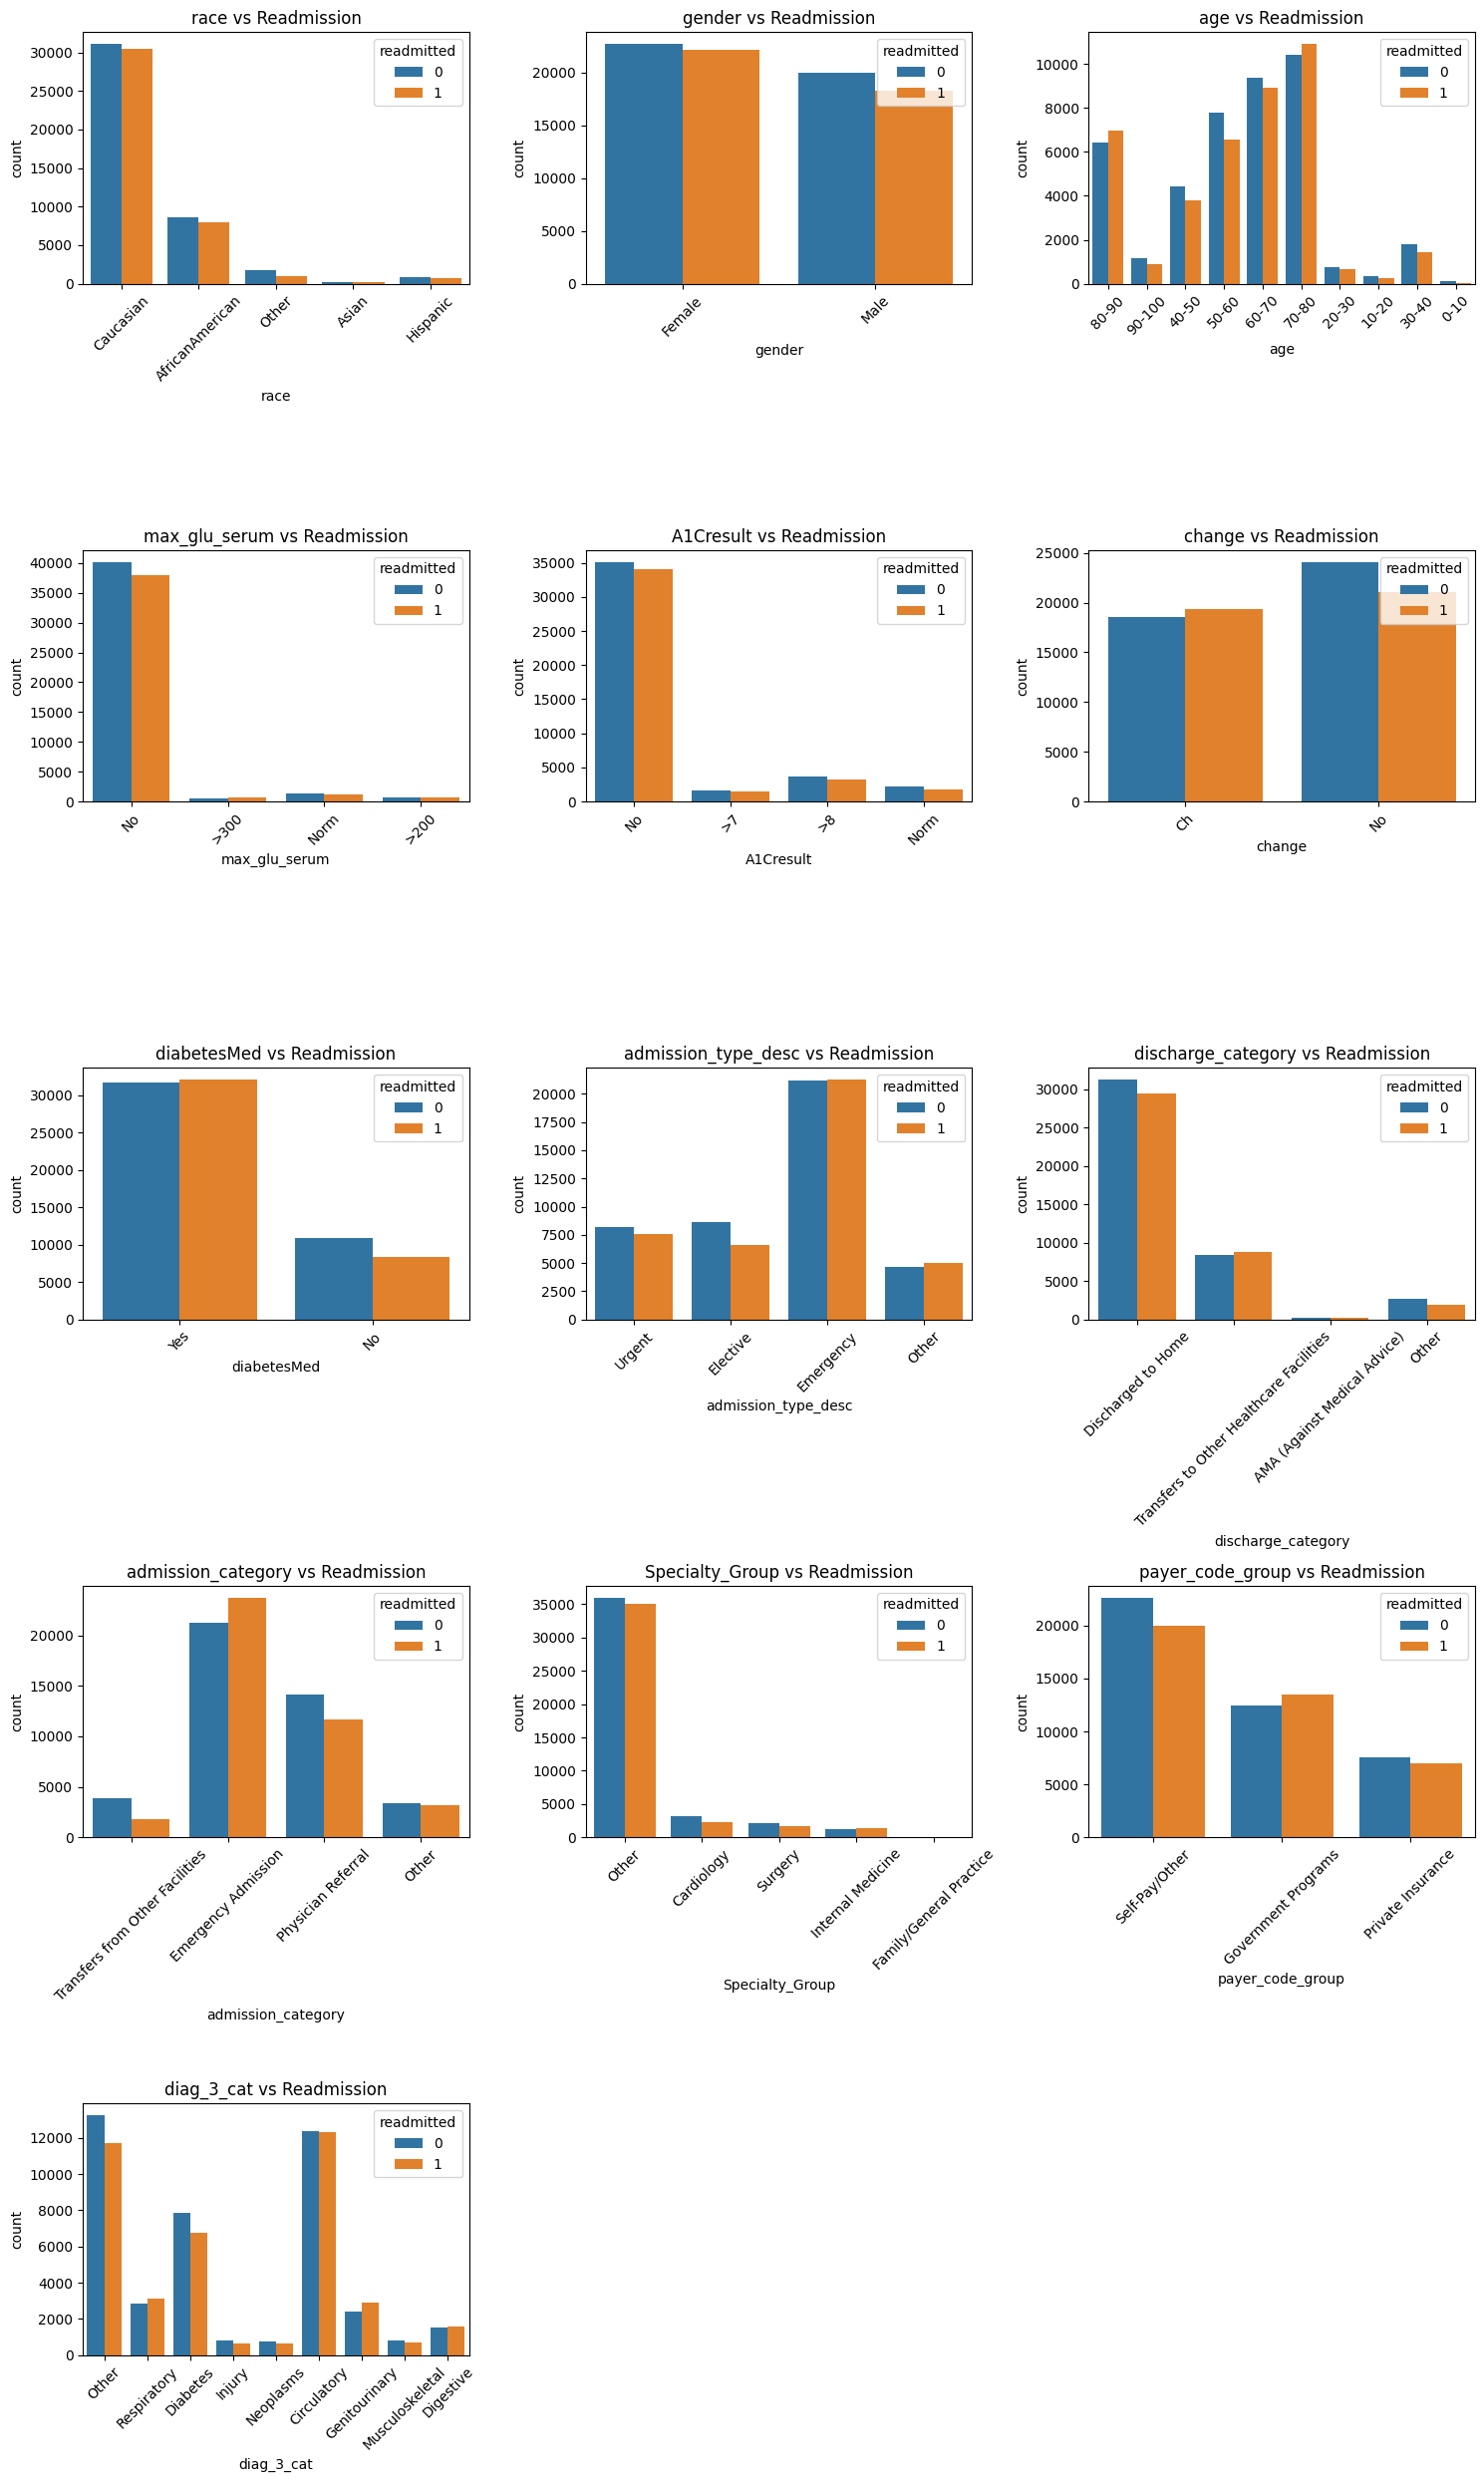

In [77]:
# Categorical Features
categorical_features = [
    'race', 'gender', 'age', 'max_glu_serum', 'A1Cresult', 'change', 
    'diabetesMed', 'admission_type_desc', 'discharge_category', 
    'admission_category', 'Specialty_Group', 'payer_code_group', 
    'diag_3_cat'
]

# Calculate the number of rows and columns for subplots
n_features = len(categorical_features)
n_cols = 3  # Number of columns
n_rows = np.ceil(n_features / n_cols).astype(int)  # Calculate number of rows

# Create subplots for categorical features
plt.figure(figsize=(15, 5 * n_rows))  # Adjust height based on number of rows
for i, col in enumerate(categorical_features):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.countplot(data=df, x=col)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Analyze relationships with the target variable (readmission)
plt.figure(figsize=(15, 5 * n_rows))
for i, col in enumerate(categorical_features):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.countplot(data=df, x=col, hue='readmitted')
    plt.title(f'{col} vs Readmission')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

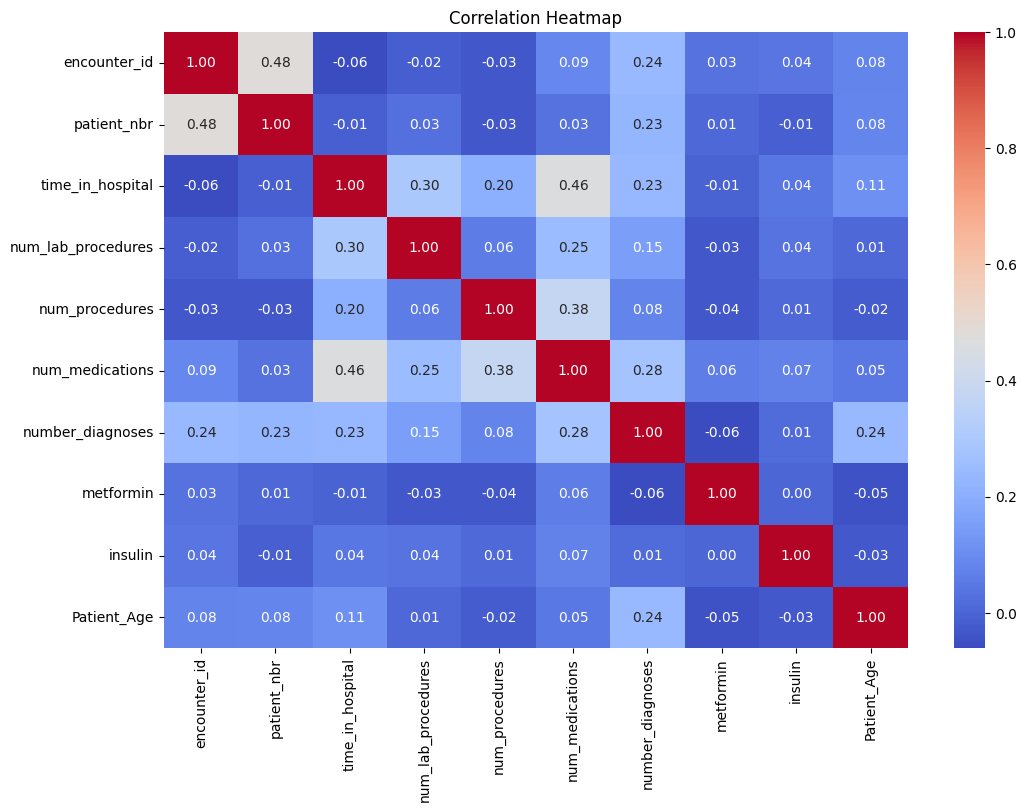

In [80]:
# Correlation Heatmap
plt.figure(figsize=(12, 8))
correlation_matrix =  df[num_features].corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

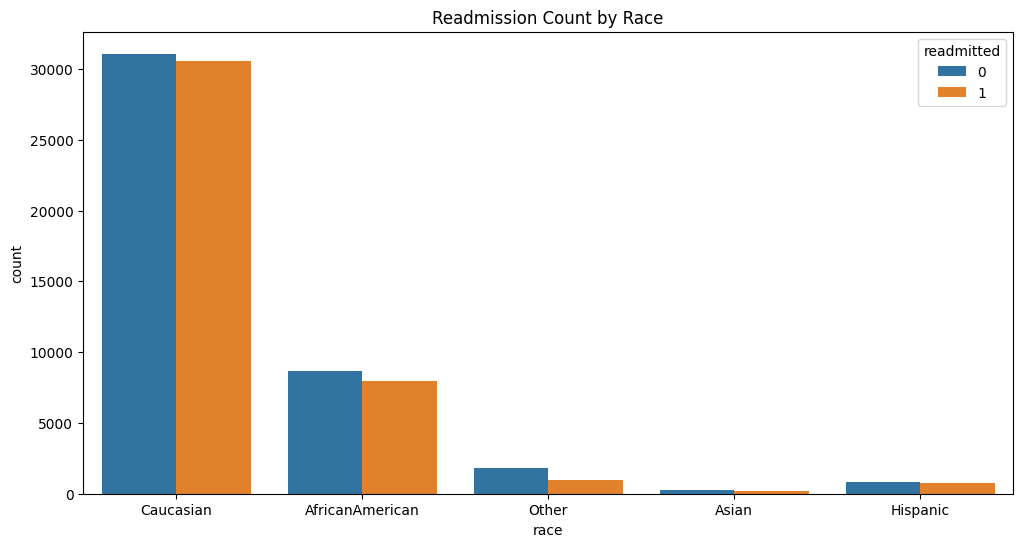

In [81]:
# Analyze readmission by race
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='race', hue='readmitted')
plt.title('Readmission Count by Race')
plt.show()

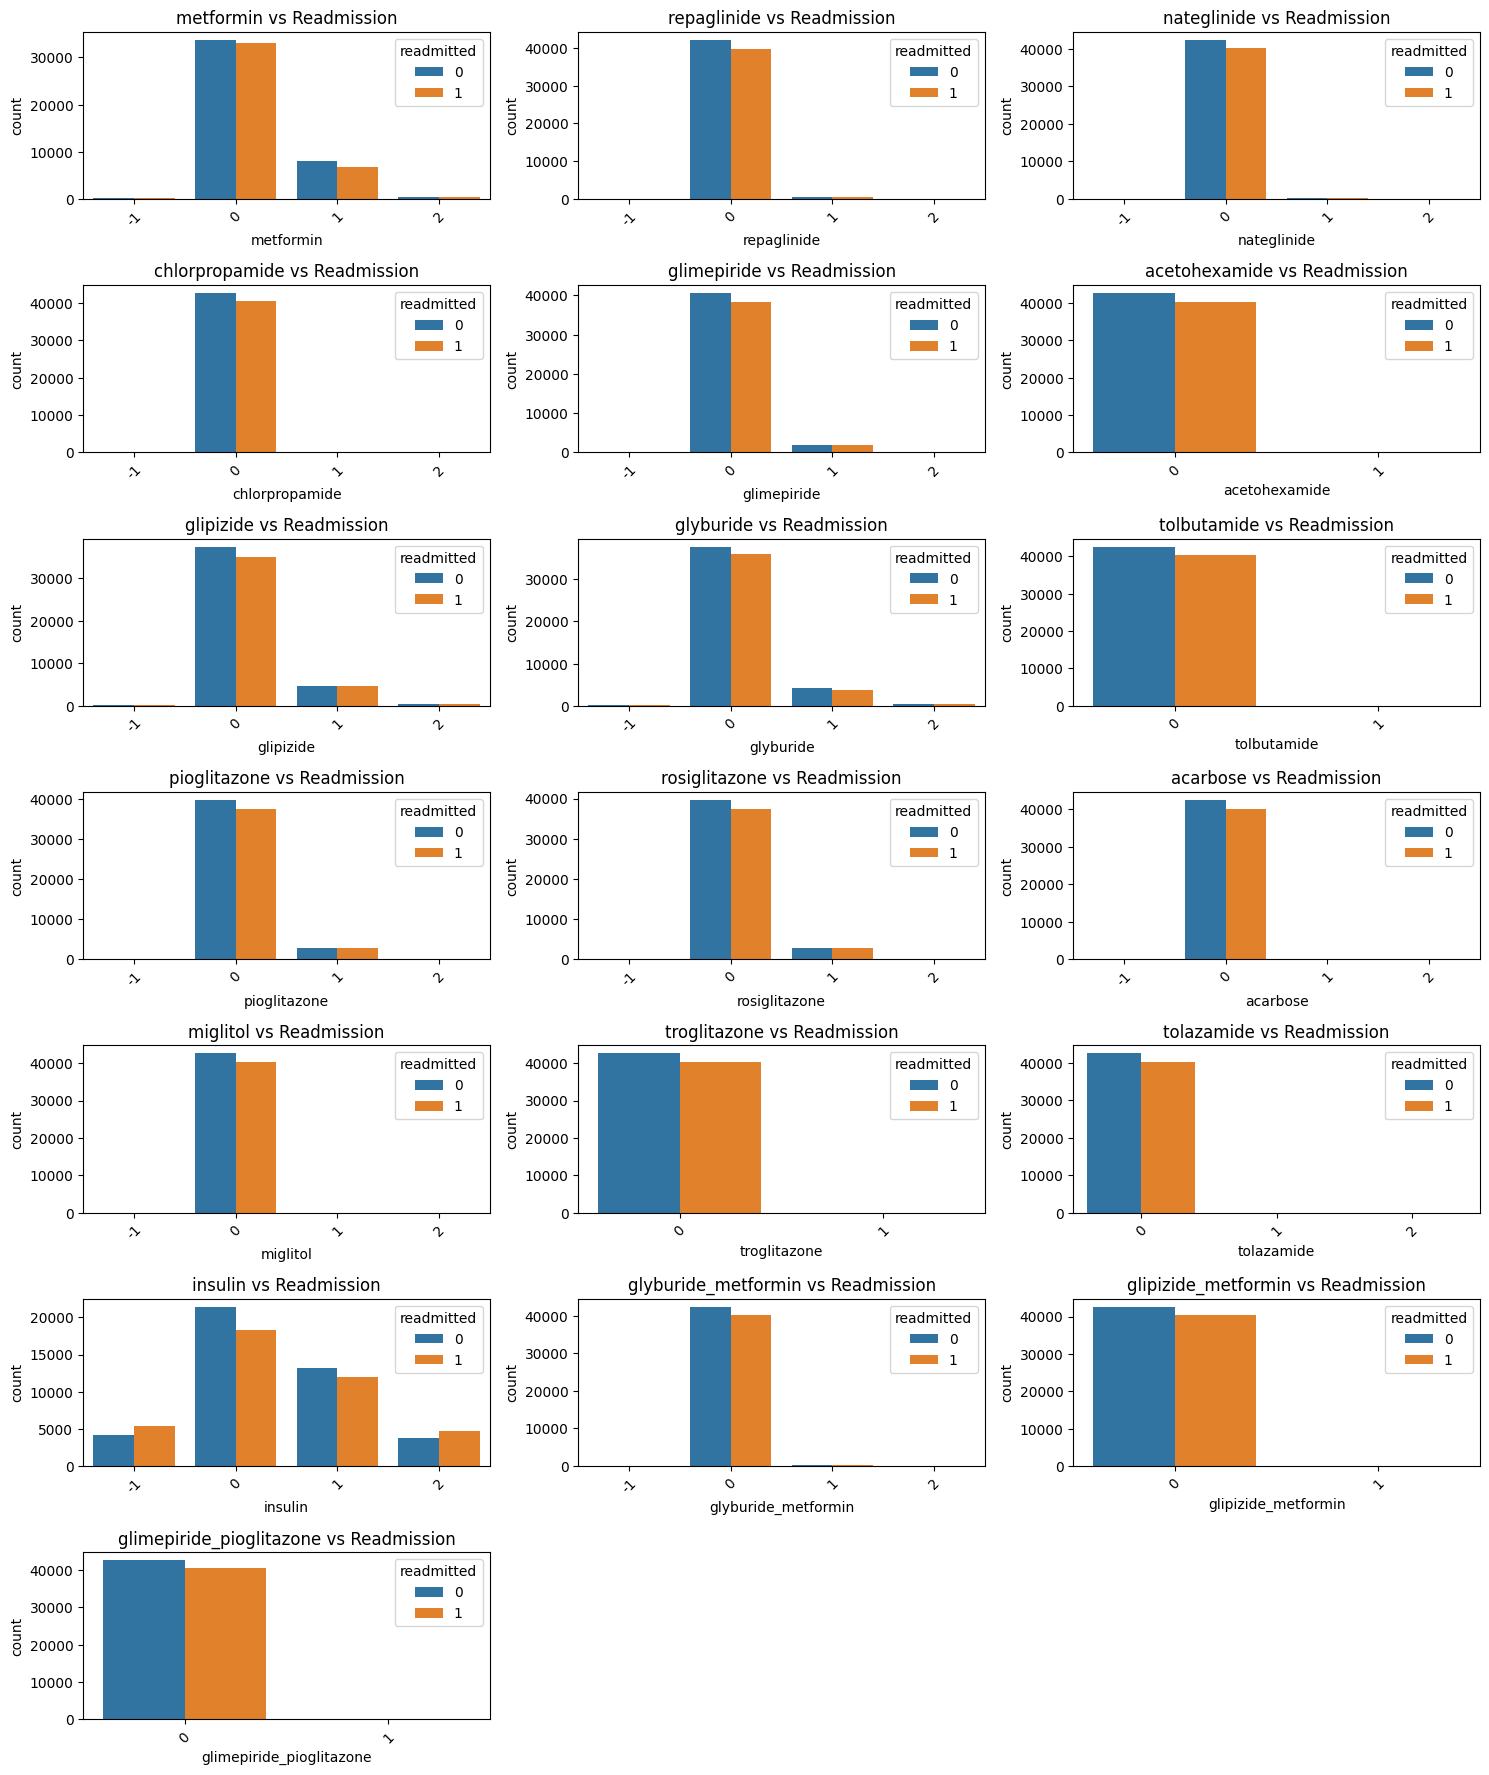

In [92]:
# 4. Medication and Readmission Analysis
medications = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 
               'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 
               'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 
               'miglitol', 'troglitazone', 'tolazamide', 'insulin', 
               'glyburide_metformin', 'glipizide_metformin', 
               'glimepiride_pioglitazone']

# Create subplots for medication effects on readmission
plt.figure(figsize=(15, 25))
for i, med in enumerate(medications):
    plt.subplot(10, 3, i+1)
    sns.countplot(data=df, x=med, hue='readmitted')
    plt.title(f'{med} vs Readmission')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\sapna\AppData\Local\Temp\ipykernel_9740\2425284593.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=readmission_percentage_diag_3_df, x='diag_3_cat', y='readmission_percentage', palette='viridis')


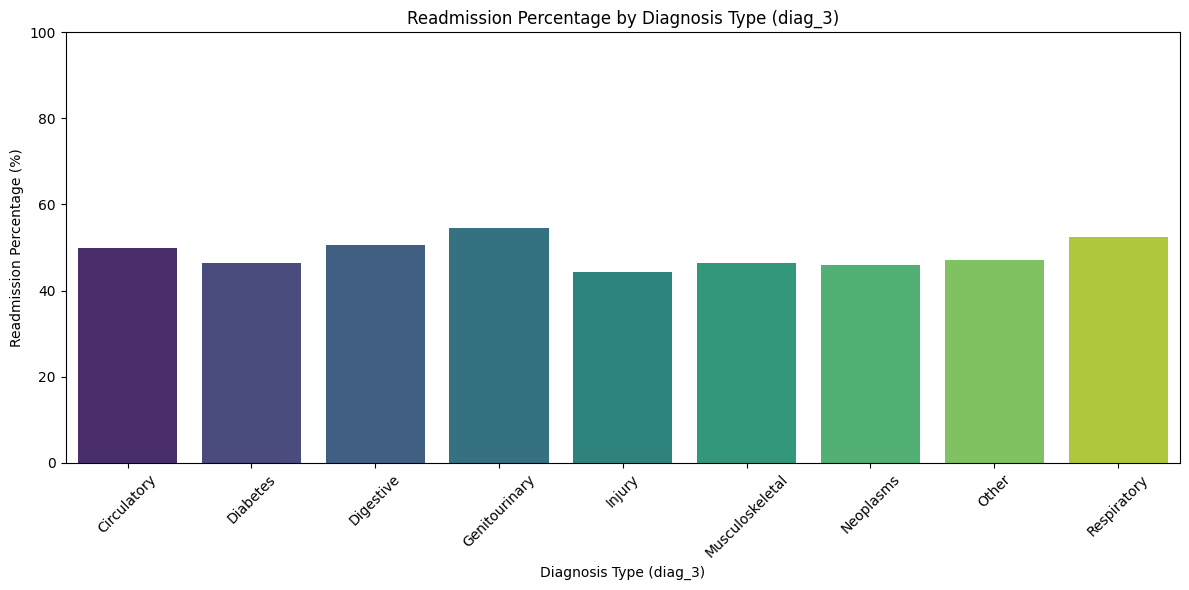

In [98]:
# Create a DataFrame with counts of readmissions and non-readmissions for each diagnosis type in diag_3
readmission_counts_diag_3 = pd.crosstab(df['diag_3_cat'], df['readmitted'])

# Calculate the readmission percentage
readmission_counts_diag_3['readmission_percentage'] = (readmission_counts_diag_3[1] / 
                                                       (readmission_counts_diag_3[0] + readmission_counts_diag_3[1])) * 100

# Reset index to make 'diag_3_cat' a column again
readmission_percentage_diag_3_df = readmission_counts_diag_3[['readmission_percentage']].reset_index()

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(data=readmission_percentage_diag_3_df, x='diag_3_cat', y='readmission_percentage', palette='viridis')
plt.title('Readmission Percentage by Diagnosis Type (diag_3)')
plt.xlabel('Diagnosis Type (diag_3)')
plt.ylabel('Readmission Percentage (%)')
plt.xticks(rotation=45)
plt.ylim(0, 100)  # Set y-axis limits from 0 to 100%
plt.grid(axis='y')
plt.grid(visible=False)
# Show the plot
plt.tight_layout()
plt.show()